In [1]:
import netCDF4
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.basemap import Basemap, pyproj
#from JSAnimation.IPython_display import display_animation
from matplotlib import animation
import time
import datetime
import pyart
%matplotlib inline 

In [5]:
hrrr_dap = netCDF4.Dataset('http://thredds-jumbo.unidata.ucar.edu/thredds/dodsC/grib/HRRR/CONUS_3km/wrfprs')
hrrr_dap_sfc = netCDF4.Dataset('http://thredds-jumbo.unidata.ucar.edu/thredds/dodsC/grib/NCEP/HRRR/CONUS_2p5km/TwoD')

In [6]:
print(hrrr_dap.dimensions)

OrderedDict([(u'isobaric', <type 'netCDF4.Dimension'>: name = 'isobaric', size = 40
), (u'reftime', <type 'netCDF4.Dimension'>: name = 'reftime', size = 60
), (u'time', <type 'netCDF4.Dimension'>: name = 'time', size = 23
), (u'x', <type 'netCDF4.Dimension'>: name = 'x', size = 1799
), (u'y', <type 'netCDF4.Dimension'>: name = 'y', size = 1059
)])


In [7]:
print(hrrr_dap_sfc.variables['time'])
print(hrrr_dap_sfc.variables['time'][-1])
for dt in netCDF4.num2date(hrrr_dap_sfc.variables['time'][-1], hrrr_dap_sfc.variables['time'].units):
    print(dt)
datetime.datetime.utcnow().strftime("%a %b %d %H:%M:%S %Z %Y")


<type 'netCDF4.Variable'>
float64 time(reftime, time)
    units: Hour since 2015-06-26T00:00:00Z
    standard_name: time
    long_name: GRIB forecast or observation time
    calendar: proleptic_gregorian
    _CoordinateAxisType: Time
unlimited dimensions: 
current shape = (86, 15)
filling off

[  85.   86.   87.   88.   89.   90.   91.   92.   93.   94.   95.   96.
   97.   99.  100.]
2015-06-29 13:00:00
2015-06-29 14:00:00
2015-06-29 15:00:00
2015-06-29 16:00:00
2015-06-29 17:00:00
2015-06-29 18:00:00
2015-06-29 19:00:00
2015-06-29 20:00:00
2015-06-29 21:00:00
2015-06-29 22:00:00
2015-06-29 23:00:00
2015-06-30 00:00:00
2015-06-30 01:00:00
2015-06-30 03:00:00
2015-06-30 04:00:00


'Mon Jun 29 14:32:03  2015'

<matplotlib.colorbar.Colorbar instance at 0x1175a63f8>

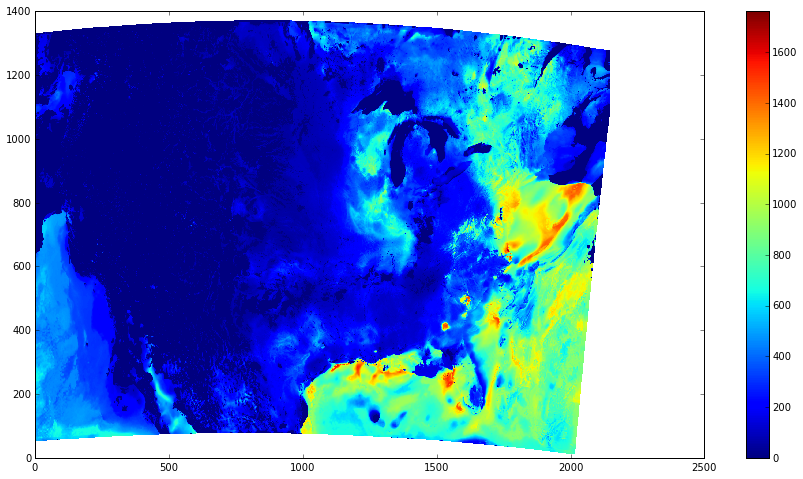

In [8]:
fig = plt.figure(figsize = [15,8])
pc = plt.pcolormesh(hrrr_dap_sfc.variables['Planetary_boundary_layer_height_surface'][-1,0,:,:])
plt.colorbar()

<matplotlib.colorbar.Colorbar instance at 0x11ece3098>

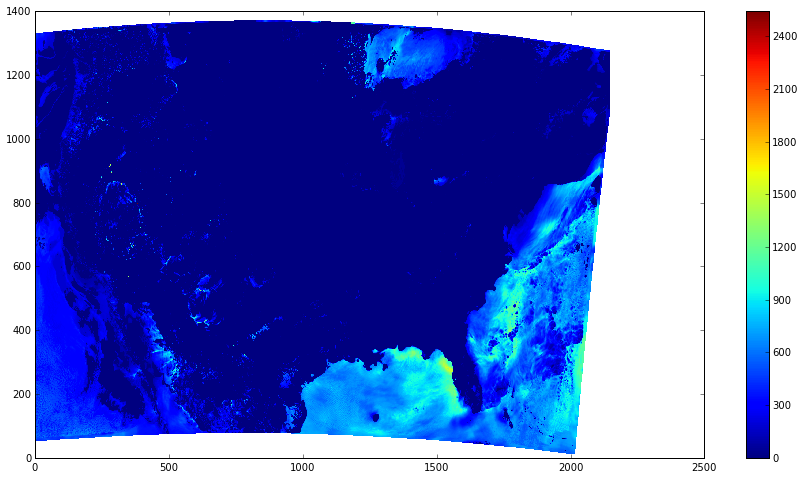

In [9]:
fig = plt.figure(figsize = [15,8])
pc = plt.pcolormesh(hrrr_dap_sfc.variables['Planetary_boundary_layer_height_surface'][-1,-1,:,:])
plt.colorbar()

In [10]:
today = hrrr_dap_sfc.variables['Planetary_boundary_layer_height_surface'][-1,:,:,:]

In [11]:
print(today.shape)

(16, 1377, 2145)


In [12]:
max_pbl = today.max(axis = 0)
print(max_pbl.shape)

(1377, 2145)


<matplotlib.colorbar.Colorbar instance at 0x10fb55a28>

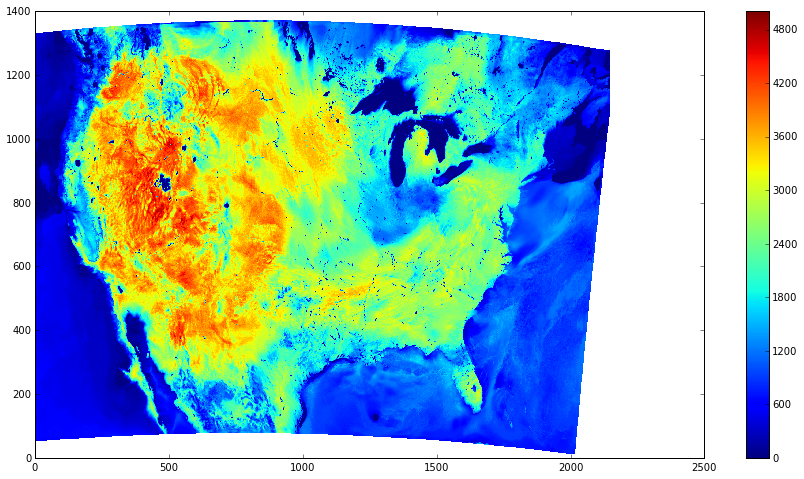

In [13]:
fig = plt.figure(figsize = [15,8])
pc = plt.pcolormesh(max_pbl)
plt.colorbar()

In [50]:
print(hrrr_dap.variables.keys())
print(hrrr_dap.variables['time'])
print(hrrr_dap.variables['time'][-1])
for dt in netCDF4.num2date(hrrr_dap.variables['time'][-1], hrrr_dap.variables['time'].units):
    print(dt)
datetime.datetime.utcnow().strftime("%a %b %d %H:%M:%S %Z %Y")


[u'x', u'y', u'reftime', u'time', u'isobaric', u'LambertConformal_Projection', u'Cloud_ice_isobaric', u'Graupel_snow_pellets_isobaric', u'Specific_humidity_isobaric', u'Temperature_isobaric', u'Relative_humidity_isobaric', u'u-component_of_wind_isobaric', u'v-component_of_wind_isobaric', u'Geopotential_height_isobaric', u'Dewpoint_temperature_isobaric', u'Vertical_velocity_pressure_isobaric', u'Absolute_vorticity_isobaric', u'Cloud_mixing_ratio_isobaric', u'Rain_mixing_ratio_isobaric', u'Snow_mixing_ratio_isobaric']
<type 'netCDF4.Variable'>
float64 time(reftime, time)
    units: Hour since 2015-06-19T00:00:00Z
    standard_name: time
    long_name: GRIB forecast or observation time
    calendar: proleptic_gregorian
    _CoordinateAxisType: Time
unlimited dimensions: 
current shape = (23, 16)
filling off

[  87.   88.   89.   90.   91.   92.   93.   94.   95.   96.   97.   98.
   99.  100.  101.  102.]
2015-06-22 15:00:00
2015-06-22 16:00:00
2015-06-22 17:00:00
2015-06-22 18:00:00
2015

'Mon Jun 22 18:54:03  2015'

In [16]:
print(hrrr_dap.variables['Temperature_isobaric'].shape)
print(hrrr_dap.variables.keys())

(60, 23, 40, 1059, 1799)
[u'x', u'y', u'reftime', u'time', u'isobaric', u'LambertConformal_Projection', u'Cloud_ice_isobaric', u'Graupel_snow_pellets_isobaric', u'Specific_humidity_isobaric', u'Temperature_isobaric', u'Relative_humidity_isobaric', u'u-component_of_wind_isobaric', u'v-component_of_wind_isobaric', u'Geopotential_height_isobaric', u'Dewpoint_temperature_isobaric', u'Vertical_velocity_pressure_isobaric', u'Absolute_vorticity_isobaric', u'Cloud_mixing_ratio_isobaric', u'Rain_mixing_ratio_isobaric', u'Snow_mixing_ratio_isobaric']


<matplotlib.colorbar.Colorbar instance at 0x11146e6c8>

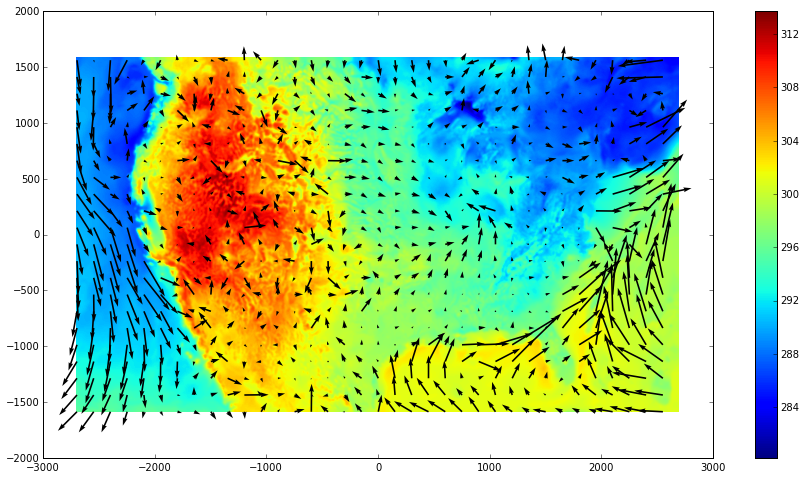

In [27]:
x = hrrr_dap.variables['x'][:]
y = hrrr_dap.variables['y'][:]
samp = 50
x10 = x[::samp]
y10 = y[::samp]        
fig = plt.figure(figsize = [15,8])
pc = plt.pcolormesh(x, y, hrrr_dap.variables['Temperature_isobaric'][-1,0,-1,:,:])
qp = plt.quiver(x10, y10,
                hrrr_dap.variables['u-component_of_wind_isobaric'][-1,0,-1,::samp,::samp],
                hrrr_dap.variables['v-component_of_wind_isobaric'][-1,0,-1,::samp,::samp])
plt.colorbar(mappable = pc)

In [23]:
plt.quiver?

In [22]:
plt.pcolormesh?

<matplotlib.colorbar.Colorbar instance at 0x112ac5440>

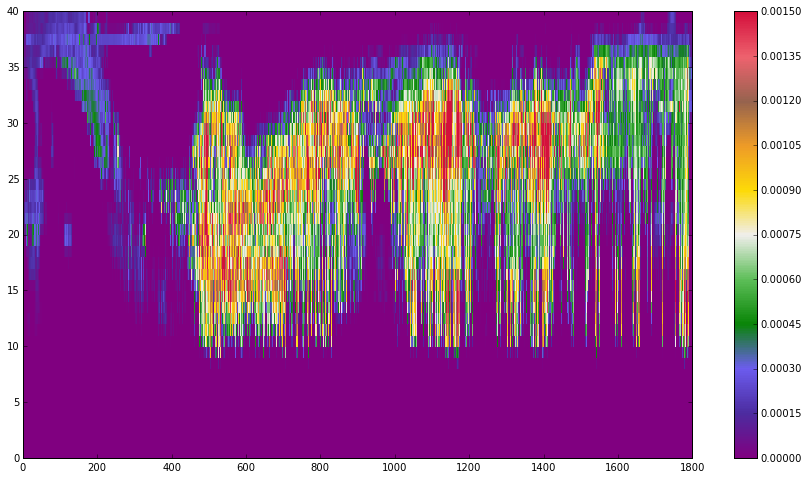

In [67]:
fig = plt.figure(figsize = [15,8])
pc = plt.pcolormesh(hrrr_dap.variables['Cloud_mixing_ratio_isobaric'][-1,5,:,:,:].max(axis=1),
                   cmap = pyart.graph.cm.RRate11, vmax = 0.0015)
plt.colorbar()

In [55]:
print hrrr_dap_sfc.variables['Temperature_isobaric'].shape

(90, 16, 5, 1377, 2145)


In [ ]:

# data from http://water.weather.gov/precip/
prcpvar = hrrr_dap_sfc.variables['Temperature_isobaric'][-1,0,0,:,:]
latcorners = nc.variables['lat'][:]
loncorners = -nc.variables['lon'][:]
lon_0 = -nc.variables['true_lon'].getValue()
lat_0 = nc.variables['true_lat'].getValue()
# create figure and axes instances
fig = plt.figure(figsize=(8,8))
ax = fig.add_axes([0.1,0.1,0.8,0.8])
# create polar stereographic Basemap instance.
m = Basemap(projection='stere',lon_0=lon_0,lat_0=90.,lat_ts=lat_0,\
            llcrnrlat=latcorners[0],urcrnrlat=latcorners[2],\
            llcrnrlon=loncorners[0],urcrnrlon=loncorners[2],\
            rsphere=6371200.,resolution='l',area_thresh=10000)
# draw coastlines, state and country boundaries, edge of map.
m.drawcoastlines()
m.drawstates()
m.drawcountries()
# draw parallels.
parallels = np.arange(0.,90,10.)
m.drawparallels(parallels,labels=[1,0,0,0],fontsize=10)
# draw meridians
meridians = np.arange(180.,360.,10.)
m.drawmeridians(meridians,labels=[0,0,0,1],fontsize=10)
ny = data.shape[0]; nx = data.shape[1]
lons, lats = m.makegrid(nx, ny) # get lat/lons of ny by nx evenly space grid.
x, y = m(lons, lats) # compute map proj coordinates.
# draw filled contours.
clevs = [0,1,2.5,5,7.5,10,15,20,30,40,50,70,100,150,200,250,300,400,500,600,750]
cs = m.contourf(x,y,data,clevs,cmap=cm.s3pcpn)
# add colorbar.
cbar = m.colorbar(cs,location='bottom',pad="5%")
cbar.set_label('mm')
# add title
plt.title(prcpvar.long_name+' for period ending '+prcpvar.dateofdata)
plt.show()

In [33]:
print(hrrr_dap_sfc.variables.keys())

[u'x', u'y', u'reftime', u'time', u'time1', u'time2', u'height_above_ground', u'isobaric', u'height_above_ground1', u'pressure_difference_layer', u'isobaric_layer', u'height_above_ground_layer', u'pressure_difference_layer1', u'height_above_ground_layer1', u'height_above_ground_layer2', u'pressure_difference_layer2', u'isobaric1', u'sigma_layer', u'height_above_ground2', u'pressure_difference_layer3', u'height_above_ground3', u'height_above_ground_layer3', u'LambertConformal_Projection', u'time2_bounds', u'pressure_difference_layer_bounds', u'isobaric_layer_bounds', u'height_above_ground_layer_bounds', u'pressure_difference_layer1_bounds', u'height_above_ground_layer1_bounds', u'height_above_ground_layer2_bounds', u'pressure_difference_layer2_bounds', u'sigma_layer_bounds', u'pressure_difference_layer3_bounds', u'height_above_ground_layer3_bounds', u'Vertical_v-component_shear_height_above_ground_layer', u'Planetary_boundary_layer_height_surface', u'Medium_cloud_cover_middle_cloud', u'

In [56]:
print(hrrr_dap.variables['Vertical_velocity_pressure_isobaric'].units)

Pa/s
